In [36]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
""" Extract final stats from resman's diary file"""
def extract_num(lines0, is_reg=False):

    if is_reg:
        valid_loss_str     = lines0[-5]
        valid_accuracy_str = lines0[-6]
        train_loss_str     = lines0[-8]
        train_accuracy_str = lines0[-9]
        average_time_str   = lines0[-10]        
        run_time_str       = lines0[-11]   
        
    else: 
        valid_loss_str     = lines0[-6]
        valid_accuracy_str = lines0[-7]
        train_loss_str     = lines0[-10]
        train_accuracy_str = lines0[-11]
        average_time_str   = lines0[-12]        
        run_time_str       = lines0[-13]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

""" Extract number of total parameters for each net config from resman's diary file"""
def parse_num_params(lines0):
    line_str = ''.join(lines0)
    idx = line_str.find("Total params")
    param_str = line_str[idx+14:idx+14+20] # 14 is the length of string "Total params: "
    param_num = param_str.split("\n")[0]
    return int(locale.atof(param_num))

In [43]:
def extract_dim_results(results_dir):
    # Dim: subspace dim
    # AR: averaged reward (last 100 eps.)
    # NE: num of episode to achieve reward 195

    # filename list of diary
    diary_names = []
    for subdir, dirs, files in os.walk(results_dir):
        for f in files:
            if f == 'diary':
                fname = os.path.join(subdir, f)
                diary_names.append(fname)

    # print diary_names   

    dim = []
    for f in diary_names:
        # print f
        tmp_str = f.split('/')[-2]
        if tmp_str.split('_')[-2]=='LeNet':
            d = int(tmp_str.split('_')[-1])
            dim.append(d)

    dim = sorted(dim)  

    # print dim

    diary_names_ordered = []
    for d in dim:
        for f in diary_names:
            if '_'+str(d)+'/' in f:
                # print "%d is in" % d + f
                diary_names_ordered.append(f)           
    # print diary_names_ordered
    # intrinsic update method
    Dim= []
    Acc = []

    for fname in diary_names_ordered:
        tmp_str = fname.split('/')[-2]
        d = int(tmp_str.split('_')[-1])
        with open(fname,'r') as ff:
            lines0 = ff.readlines()

            try: 
                r = extract_num(lines0,False)[1]
                # print "%d dim:\n"% d + str(r) + "\n"
                Dim.append(d)
                Acc.append(r)

            except ValueError:
                print "%d dim:\n"%d + "Error \n"
                pass

    return Dim, Acc


In [45]:
def plot_perf_dim(Dim, Acc, Cx=None):
    fig, ax = subplots(figsize=(6,5) )

    font = {'size'   : 12}
    matplotlib.rc('font', **font)

    for i in range(len(Dim)):
        if Cx == None:
            if Acc[i]>Acc[0]*0.9 and i>0:
                print "d_{int}="+str(Dim[i]) + ', acc:' + str(Acc[i])
                break
        else: 
            if Acc[i]>Cx and i>0:
                print "d_{int}="+str(Dim[i]) + ', acc:' + str(Acc[i])
                break
                
            
    
    plot(Dim[1:], Acc[1:], 'o', mec='b', mfc=(.8,.8,1), ms=10)
    plot(Dim[i], Acc[i], 'o', mec='b', mfc='b', ms=10)
    axhline(Acc[0], ls='-', color='k',label='baseline')
    axhline(Acc[0] * .9, ls=':', color='k',label='solved')
    plt.legend()
    ax.set_xlabel('Subspace dimension $d$')
    ax.set_ylabel('Validation accuracy')

    # ax.set_title('Cifar: Untied_LeNet' )
    plt.grid()
    ax.set_ylim([0.0,1.01])
    # fig.savefig("figs/fnn_mnistPL_W"+str(width[i])+"_L"+str(depth[j])+".pdf", bbox_inches='tight')


[0, 1000, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 6750, 7000, 7500, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000] [0.6112, 0.3731, 0.4075, 0.4165, 0.4303, 0.4334, 0.4465, 0.4503, 0.4571, 0.4649, 0.4745, 0.4825, 0.4913, 0.4851, 0.4971, 0.4959, 0.5025, 0.5041, 0.5095, 0.5125, 0.5208, 0.5301, 0.5351, 0.5404, 0.5406, 0.5406, 0.5508]
d_{int}=6750, acc:0.5025
17500 dim:
Error 

20000 dim:
Error 

25000 dim:
Error 

[0, 1000, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 6750, 7000, 7500, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000] [0.5231, 0.265, 0.2853, 0.3007, 0.3116, 0.3168, 0.32, 0.3283, 0.335, 0.343, 0.3533, 0.3585, 0.3617, 0.3722, 0.3745, 0.3794, 0.3838, 0.3865, 0.3914, 0.3934, 0.3984, 0.3994, 0.4093, 0.4095, 0.419, 0.4198, 0.4284]
d_{int}=600, acc:0.9001
[0, 100, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500,

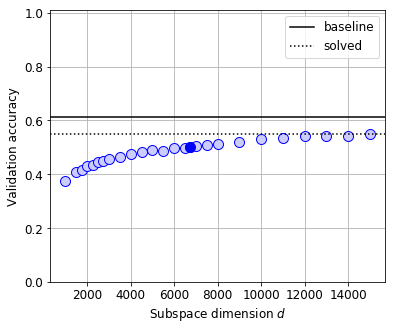

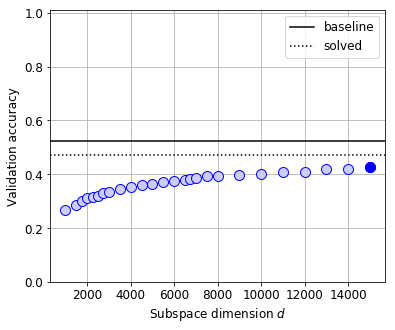

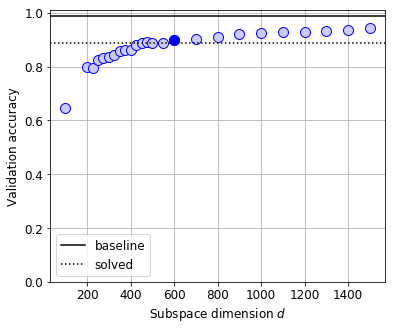

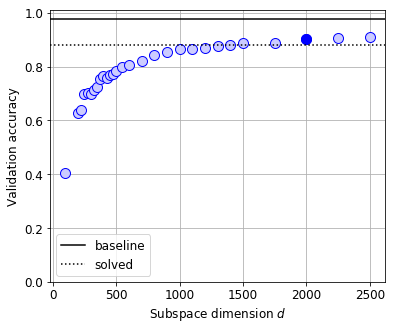

In [44]:
Dim, AR, NE = [],[],[]
results_root = '/home/users/chunyuan.li/public_results/chun/'

dataset = ['cifar', 'mnist']
net     = ['Untied_LeNet', 'MLP_LeNet']


exp_folder = 'results_cifar_Untied_LeNet2'
results_dir = results_root + exp_folder
Dim, Acc= extract_dim_results(results_dir)
print Dim, Acc
plot_perf_dim(Dim, Acc, 0.5)


exp_folder = 'results_cifar_MLP_LeNet3'
results_dir = results_root + exp_folder
Dim, Acc= extract_dim_results(results_dir)
print Dim, Acc
plot_perf_dim(Dim, Acc, 0.5)


exp_folder = 'results_mnist_Untied_LeNet3'
results_dir = results_root + exp_folder
Dim, Acc= extract_dim_results(results_dir)
# print Dim, Acc
plot_perf_dim(Dim, Acc, 0.9)


exp_folder = 'results_mnist_MLP_LeNet3'
results_dir = results_root + exp_folder
Dim, Acc= extract_dim_results(results_dir)
print Dim, Acc
plot_perf_dim(Dim, Acc, 0.9)